# 1. Setup and Data Loading

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot styles for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size
plt.rcParams['font.size'] = 12

# Load the dataset
# Assuming 'data.csv' is located in the 'data/' directory relative to your notebook.
# You might need to adjust the path if your notebook is not in the 'notebooks/' directory
# or if you placed the CSV file elsewhere.
try:
    df = pd.read_csv('../data/data.csv')
    print("Successfully loaded 'data.csv'")
except FileNotFoundError:
    print("File not found. Please ensure 'data.csv' is in 'data/' relative to your project root.")
    print("Attempting to load 'Sheet1.csv' instead...")
    try:
        df = pd.read_csv('../../data/Sheet1.csv')
        print("Successfully loaded 'Sheet1.csv'")
    except FileNotFoundError:
        print("Neither 'data.csv' nor 'Sheet1.csv' found.")
        print("Please make sure the data file is placed correctly in the 'data/' folder.")
        print("You may need to manually update the path above if your setup is different.")
        df = None # Set df to None if loading fails

if df is not None:
    print("\n--- Data Overview ---")
    print(f"Shape of the dataset: {df.shape[0]} rows, {df.shape[1]} columns")

    print("\nFirst 5 rows of the dataset:")
    display(df.head()) # Using display() for better rendering in notebooks

    print("\nConcise summary of the DataFrame (data types, non-null values):")
    df.info()

Successfully loaded 'data.csv'

--- Data Overview ---
Shape of the dataset: 95662 rows, 16 columns

First 5 rows of the dataset:


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0



Concise summary of the DataFrame (data types, non-null values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  Prici

# 2. Summary Statistics

In [6]:
if df is not None:
    print("\n--- Descriptive statistics for numerical columns ---")
    display(df.describe())

    print("\n--- Descriptive statistics for categorical columns ---")
    display(df.describe(include='object'))


--- Descriptive statistics for numerical columns ---


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000



--- Descriptive statistics for categorical columns ---


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,1,6,23,9,4,94556
top,TransactionId_76871,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,95662,38189,32635,45405,56935,17


# 3. Distribution of Numerical Features

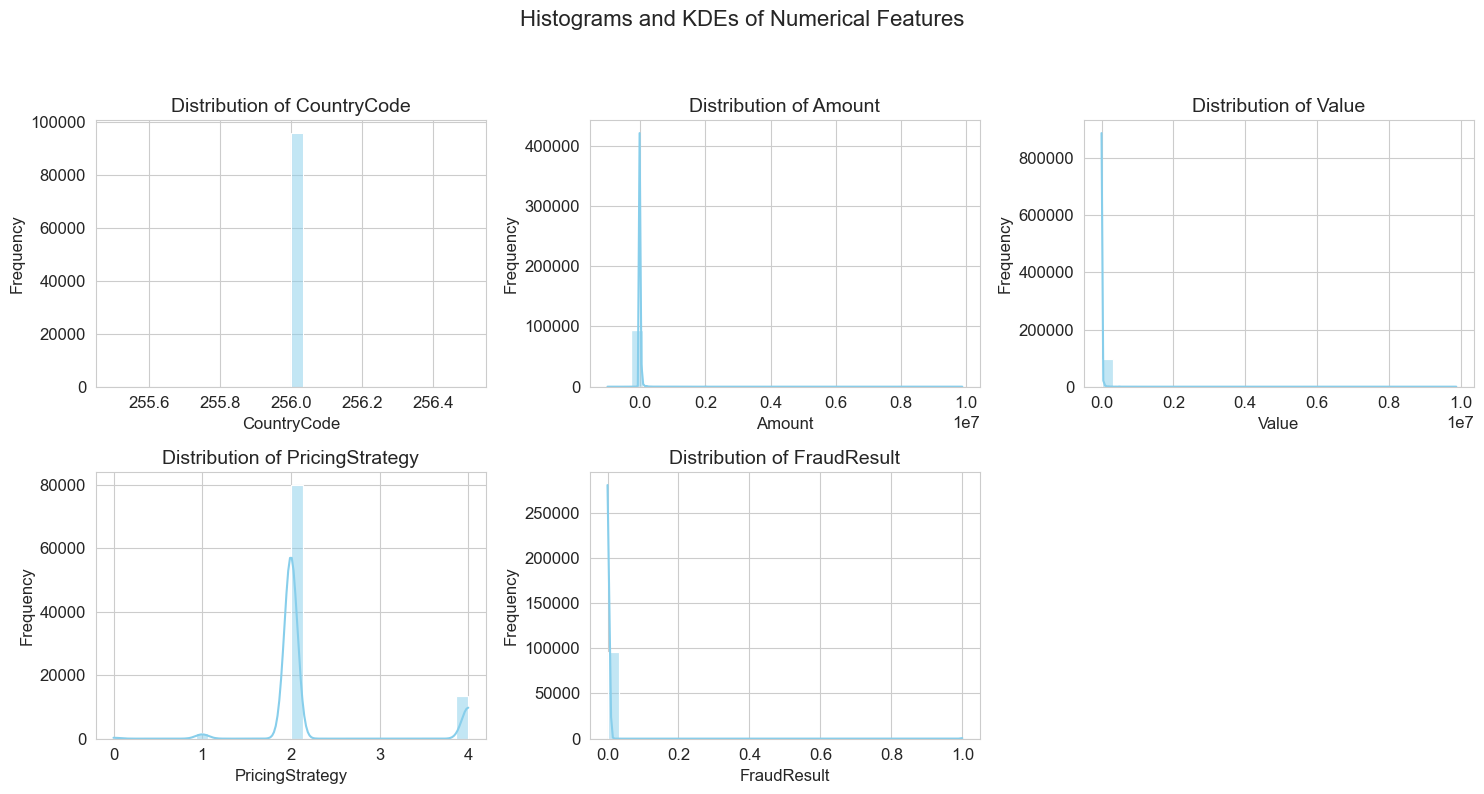

In [7]:
if df is not None:
    numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

    if not numerical_columns:
        print("No numerical columns found to plot distributions.")
    else:
        num_plots = len(numerical_columns)
        num_cols = 3
        num_rows = (num_plots + num_cols - 1) // num_cols

        plt.figure(figsize=(num_cols * 5, num_rows * 4))
        plt.suptitle('Histograms and KDEs of Numerical Features', y=1.02, fontsize=16)

        for i, col in enumerate(numerical_columns):
            plt.subplot(num_rows, num_cols, i + 1)
            sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
            plt.title(f'Distribution of {col}', fontsize=14)
            plt.xlabel(col, fontsize=12)
            plt.ylabel('Frequency', fontsize=12)
            plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout

        plt.show()

# 4. Distribution of Categorical Features

In [ ]:
if df is not None:
    categorical_columns = df.select_dtypes(include='object').columns.tolist()

    if not categorical_columns:
        print("No categorical columns found to plot distributions.")
    else:
        num_plots_cat = len(categorical_columns)
        num_cols_cat = 2
        num_rows_cat = (num_plots_cat + num_cols_cat - 1) // num_cols_cat

        plt.figure(figsize=(num_cols_cat * 6, num_rows_cat * 5))
        plt.suptitle('Bar Plots of Categorical Features', y=1.02, fontsize=16)

        for i, col in enumerate(categorical_columns):
            plt.subplot(num_rows_cat, num_cols_cat, i + 1)
            # Use value_counts to ensure proper order and handle potential NaNs for plotting
            sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
            plt.title(f'Distribution of {col}', fontsize=14)
            plt.xlabel(col, fontsize=12)
            plt.ylabel('Count', fontsize=12)
            plt.xticks(rotation=45, ha='right', fontsize=10)
            plt.tight_layout(rect=[0, 0.03, 1, 0.98])

        plt.show()

/tmp/ipykernel_19507/2712263441.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)


# 5. Correlation Analysis

# 6. Identifying Missing Values

# 7. Outlier Detection